In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns

sns.set_style("darkgrid")
np.random.seed(930525)
pd.set_option('display.max_columns', None)
warnings.simplefilter('once')

%matplotlib inline
%load_ext watermark
%watermark --iversions

numpy   1.18.1
pandas  1.0.2
seaborn 0.10.0



In [2]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import os
from glob import glob

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
input_folder = "data/csci5461spring2020-submissions-v2"
output_folder = "data/output/csci5461spring2020-submissions-v2"

os.makedirs(output_folder, exist_ok=True)

num_teams = 9
plt.rcParams.update({'font.size': 20})

In [4]:
df_truth = pd.read_csv("output/second_pass/y_test.csv", index_col=0)

In [5]:
df_truth.sort_index(inplace=True)

d_dfs = {}
for folder in glob(f"{input_folder}/*"):
    team_name = os.path.basename(folder)
    for file in glob(f"{input_folder}/{team_name}/*.csv"):
        file_name = ".".join(os.path.basename(file).split("."))[:-1]
        df = pd.read_csv(file, index_col=0)
        df.sort_index(inplace=True)
        d_dfs[f"{team_name}__{file_name}"] = df

In [6]:
num_submissions = len(d_dfs.keys())

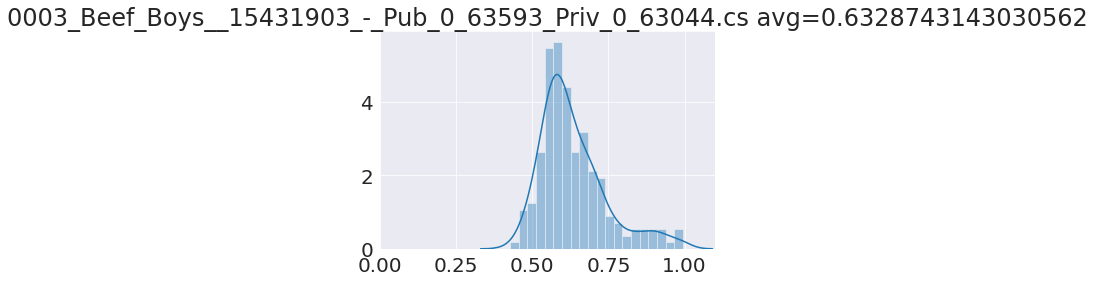

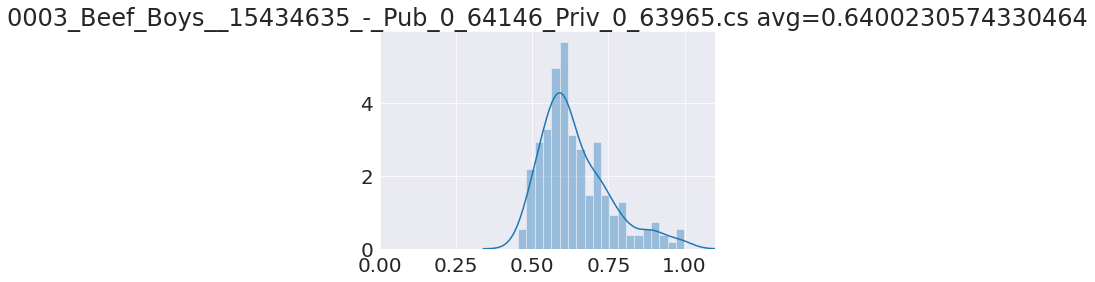

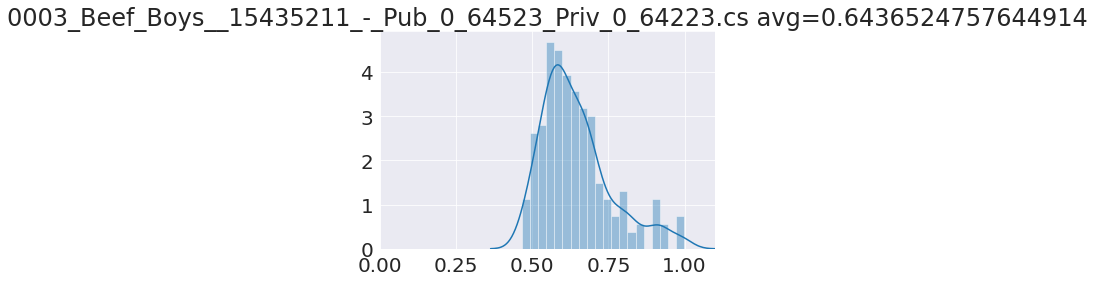

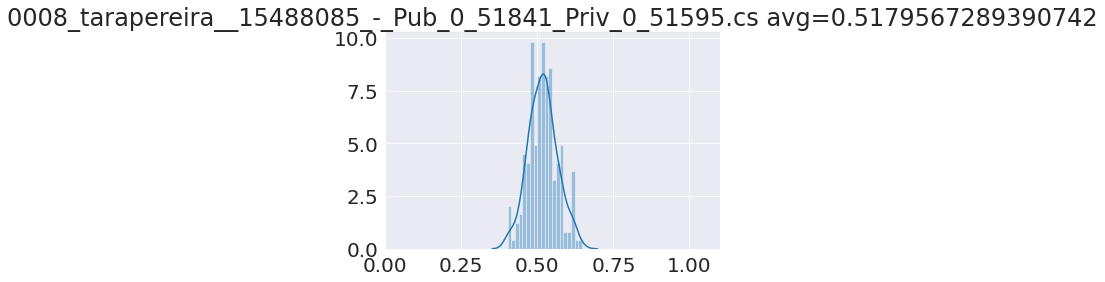

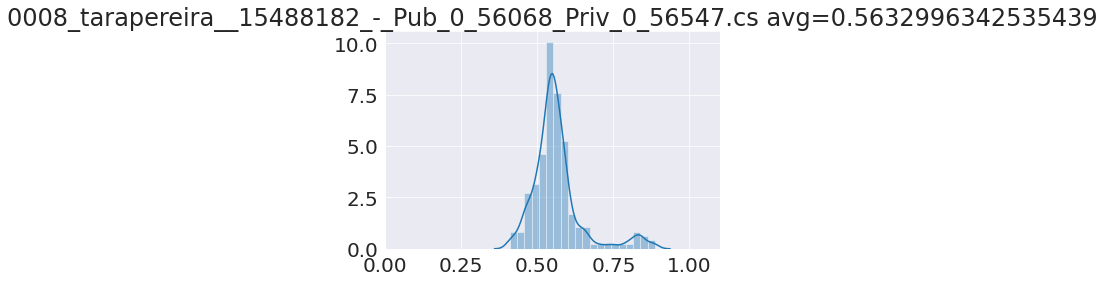

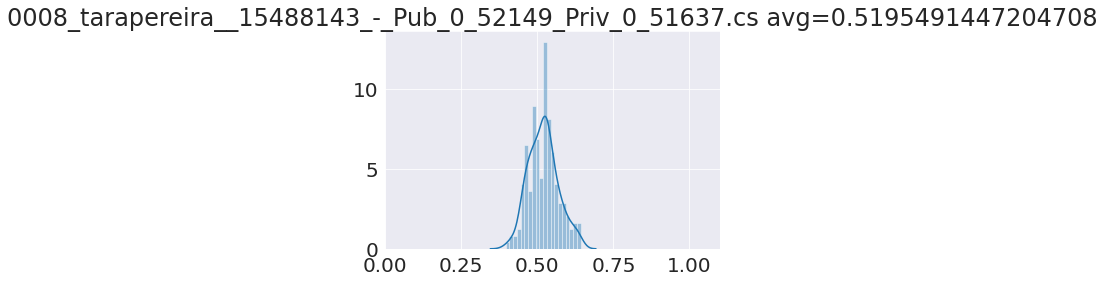

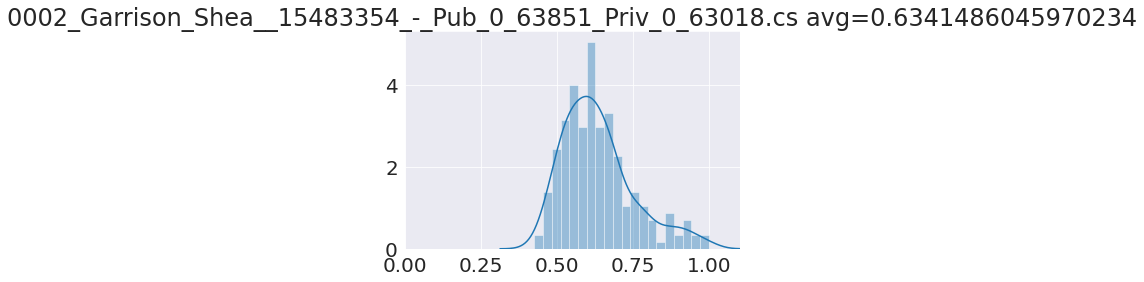

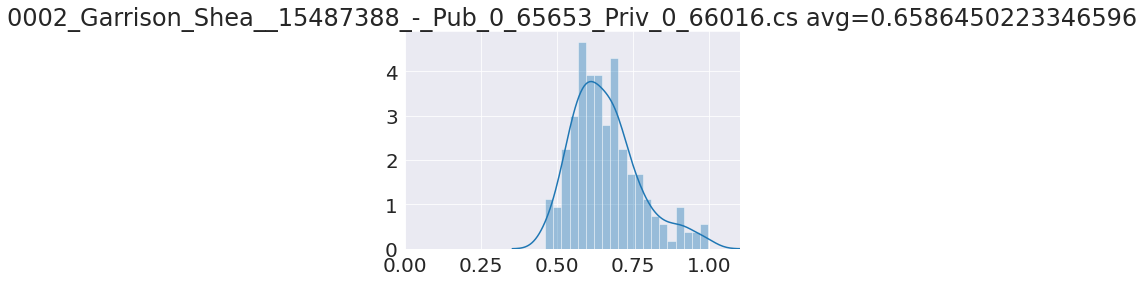

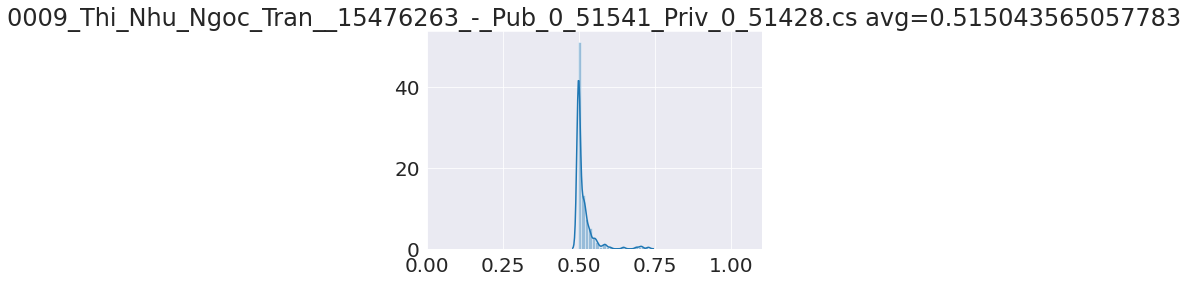

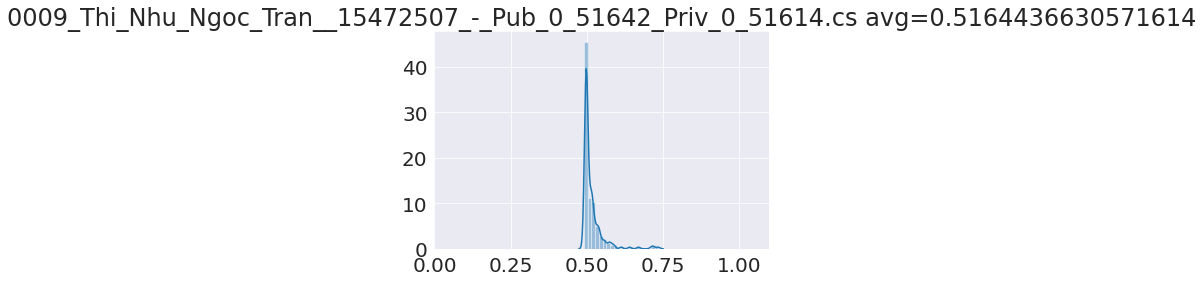

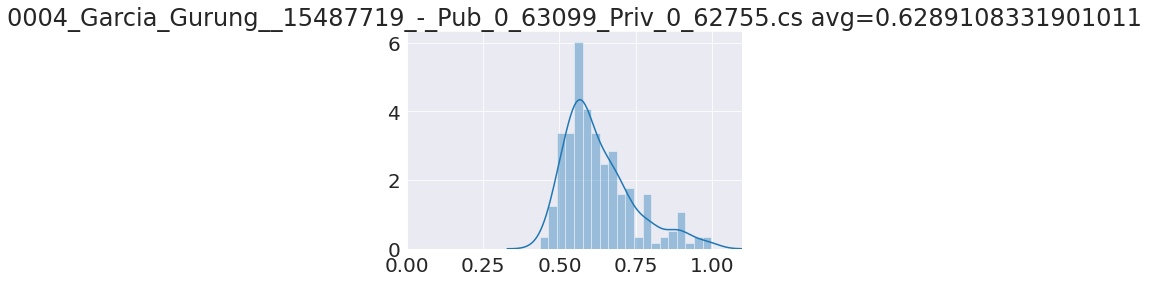

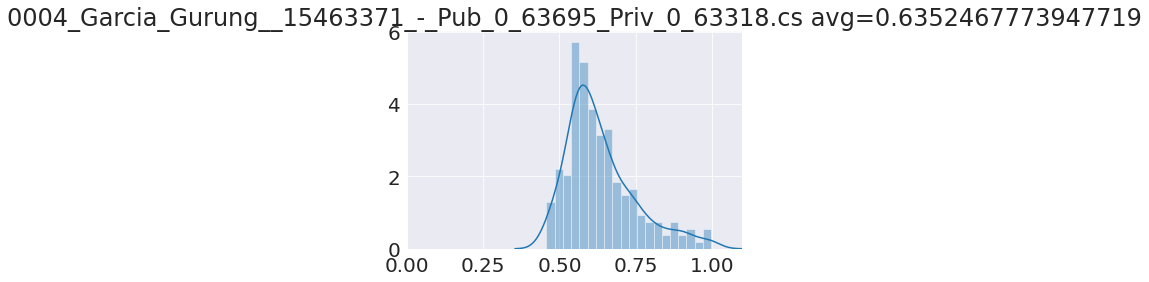

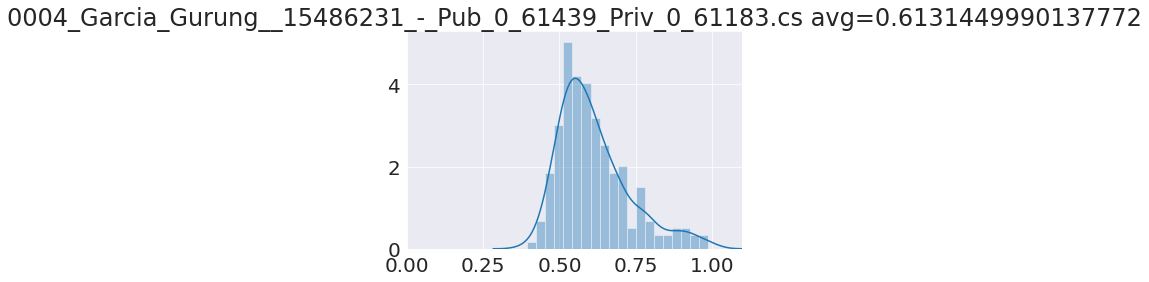

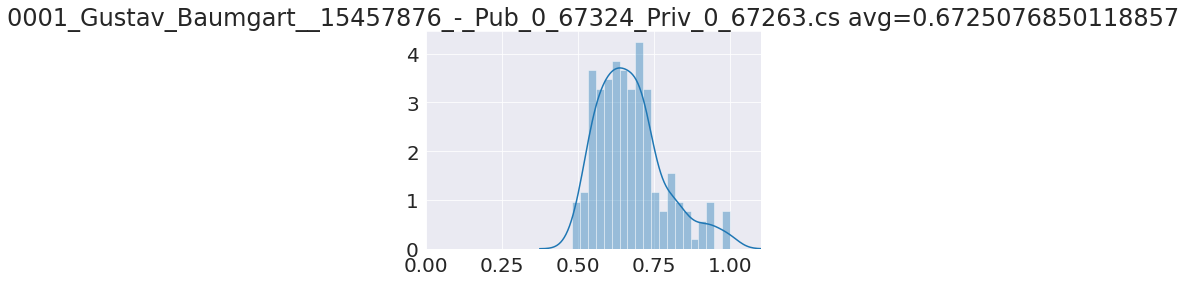

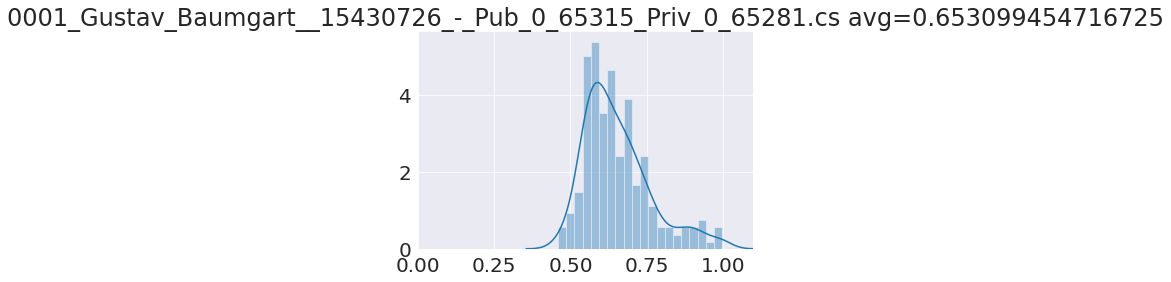

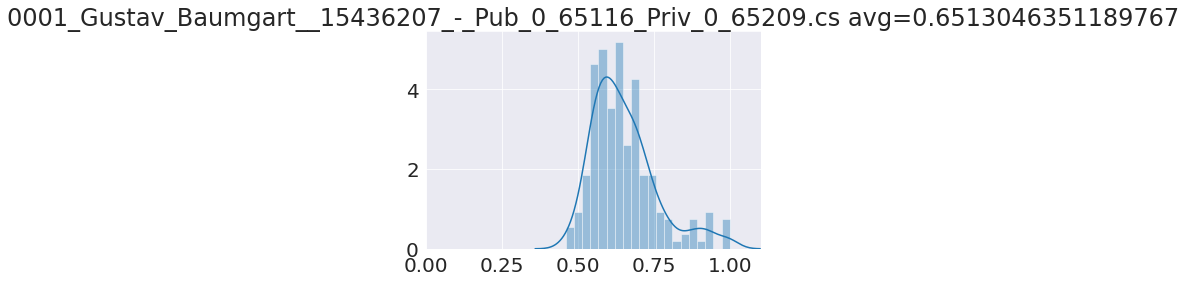

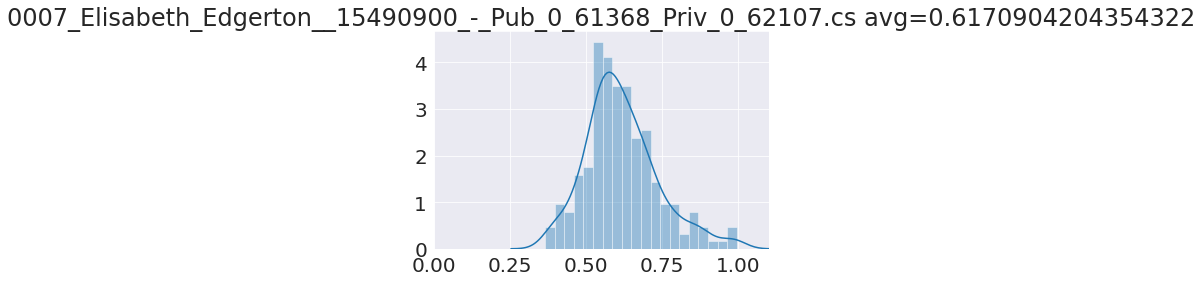

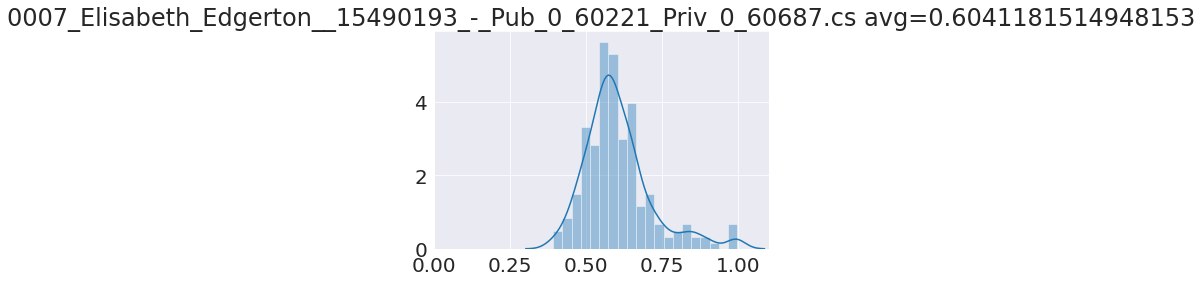

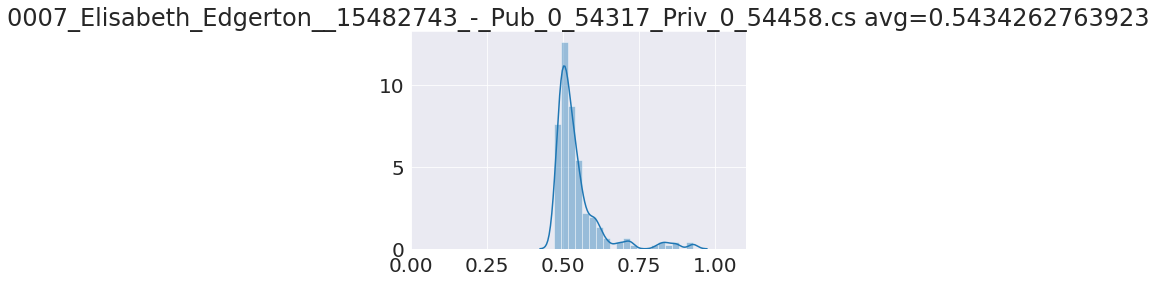

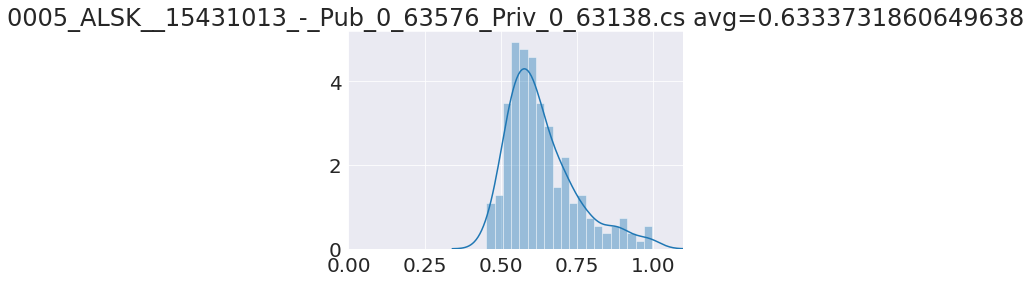

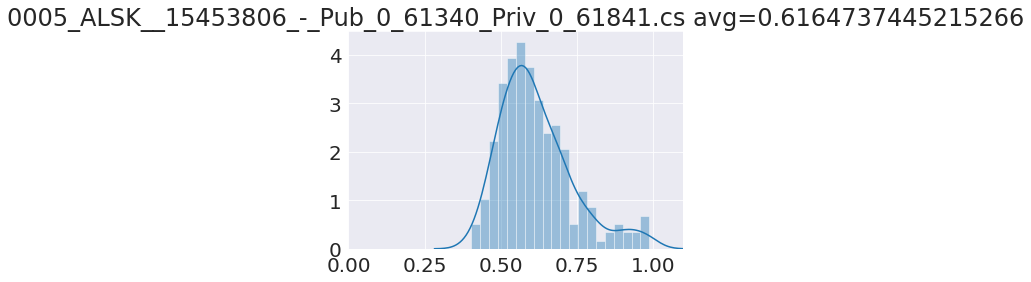

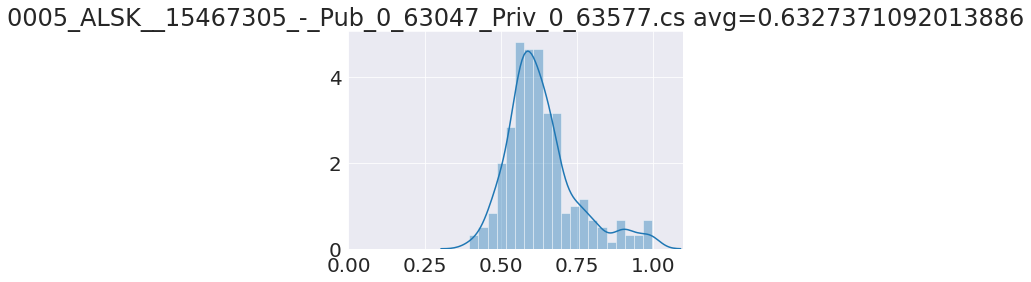

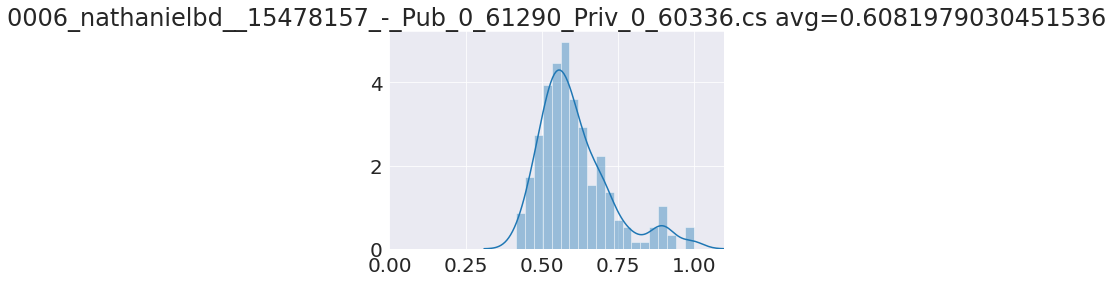

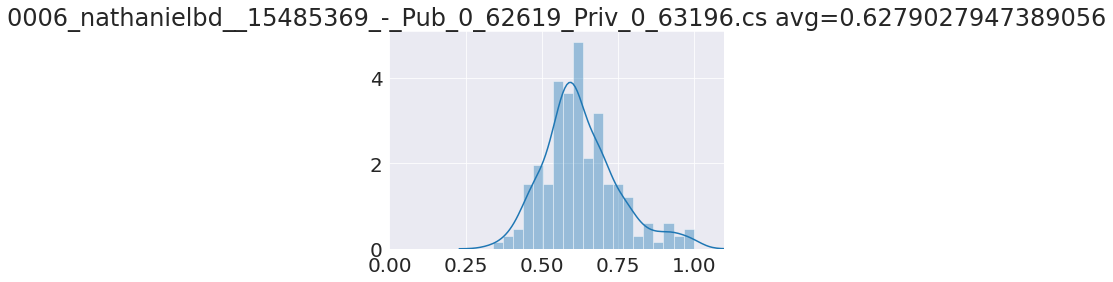

In [7]:
# get AUC predictions per team
# plot on histogram per team
rownames = list()
roc_scores = np.zeros((200, num_submissions))
for num, (sub, df) in enumerate(d_dfs.items()):
    rownames.append(sub)
    for ix, col in enumerate(df_truth.columns):
        roc_scores[ix, num] = roc_auc_score(df_truth[col], df[col])

    fig, ax = plt.subplots()
    sns.distplot(roc_scores[:, num], bins=20, ax=ax, hist=True, norm_hist=False)
    ax.set_title(f"{sub} avg={np.mean(roc_scores[:, num])}")
    ax.set_xlim(0, 1.1)
    plt.show()

In [8]:
df_roc = pd.DataFrame(data=roc_scores.T, index=rownames, columns=df_truth.columns)
df_roc.to_csv(os.path.join(output_folder, "roc_scores.csv"))
df_roc["avg_score"] = df_roc.mean(axis=1)

In [9]:
team_indices = np.arange(num_teams)
np.random.shuffle(team_indices)

In [10]:
team_indices = team_indices + 1

In [11]:
team_numbers = [_.split("__")[0] for _ in df_roc.index]
map_teams = dict(zip(np.unique(team_numbers), [f"Team {_}"for _ in team_indices]))

df_roc["team_name"] = [map_teams[_.split("__")[0]] for _ in df_roc.index]

In [12]:
df_roc[["avg_score", "team_name"]].sort_values("team_name")

,avg_score,team_name
0004_Garcia_Gurung__15463371_-_Pub_0_63695_Priv_0_63318.cs,0.635247,Team 1
0004_Garcia_Gurung__15486231_-_Pub_0_61439_Priv_0_61183.cs,0.613145,Team 1
0004_Garcia_Gurung__15487719_-_Pub_0_63099_Priv_0_62755.cs,0.628911,Team 1
0001_Gustav_Baumgart__15436207_-_Pub_0_65116_Priv_0_65209.cs,0.651305,Team 2
0001_Gustav_Baumgart__15430726_-_Pub_0_65315_Priv_0_65281.cs,0.653099,Team 2
0001_Gustav_Baumgart__15457876_-_Pub_0_67324_Priv_0_67263.cs,0.672508,Team 2
0009_Thi_Nhu_Ngoc_Tran__15476263_-_Pub_0_51541_Priv_0_51428.cs,0.515044,Team 3
0009_Thi_Nhu_Ngoc_Tran__15472507_-_Pub_0_51642_Priv_0_51614.cs,0.516444,Team 3
0007_Elisabeth_Edgerton__15482743_-_Pub_0_54317_Priv_0_54458.cs,0.543426,Team 4
0007_Elisabeth_Edgerton__15490193_-_Pub_0_60221_Priv_0_60687.cs,0.604118,Team 4


In [13]:
df_roc = df_roc.sort_values("avg_score")

df_roc_deduplicated = df_roc.drop_duplicates("team_name", keep="last").copy()
df_roc_deduplicated["color"] = sns.color_palette("deep", num_teams)
df_roc_deduplicated.sort_values("team_name", inplace=True, ascending=True)

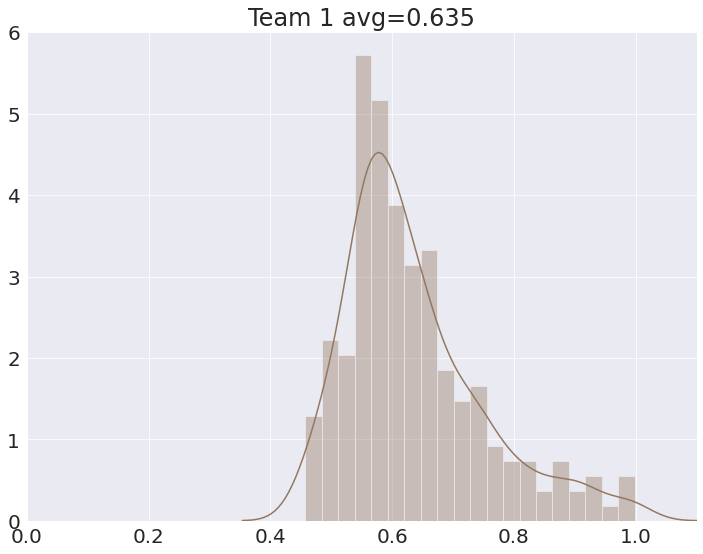

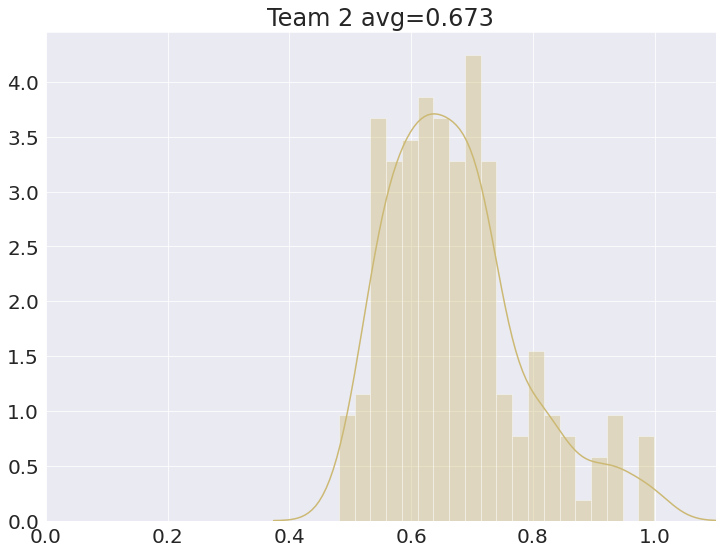

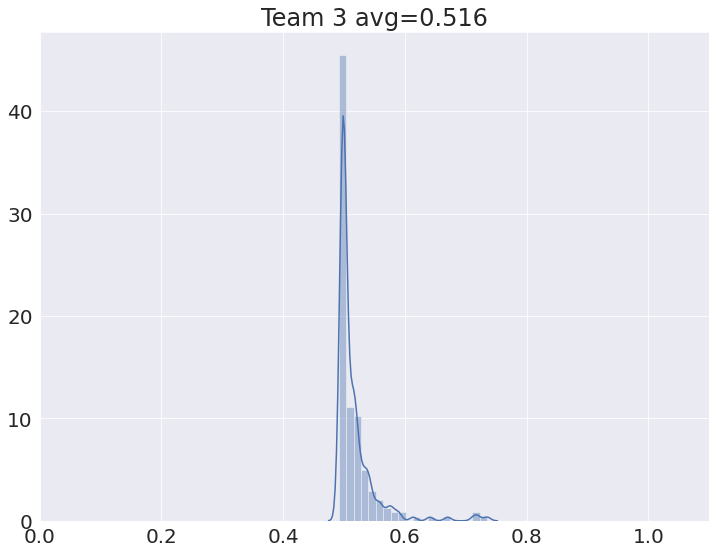

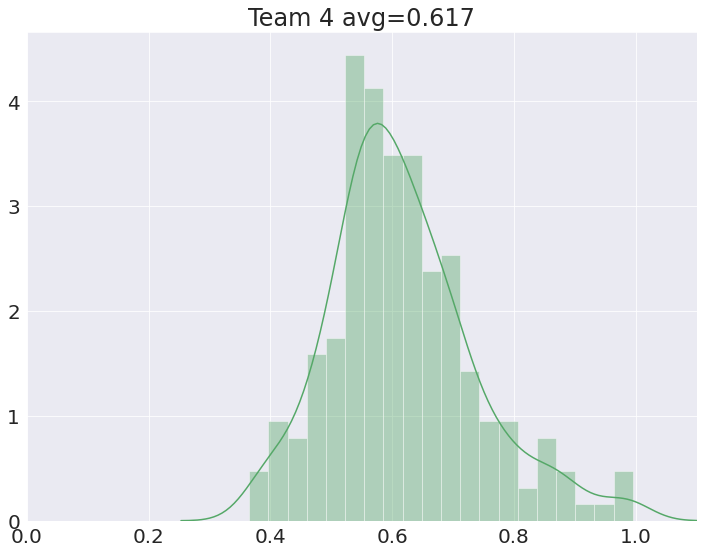

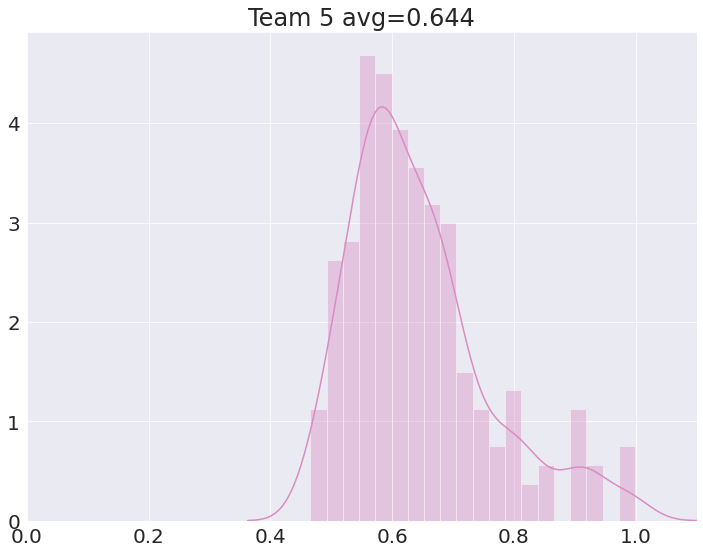

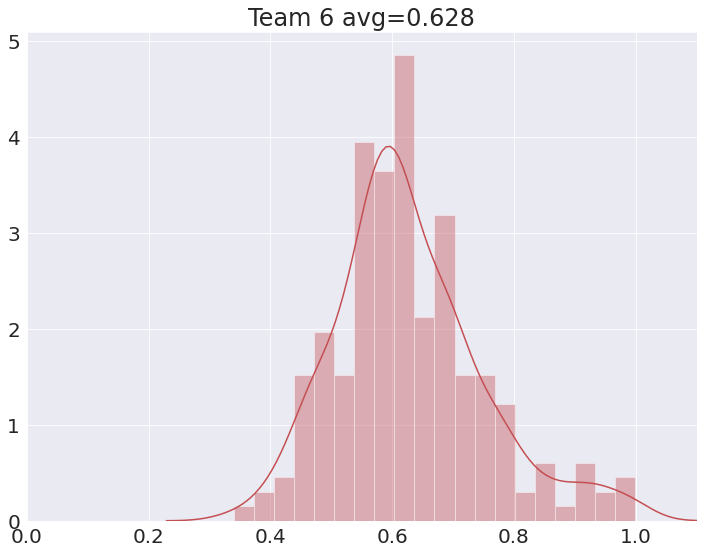

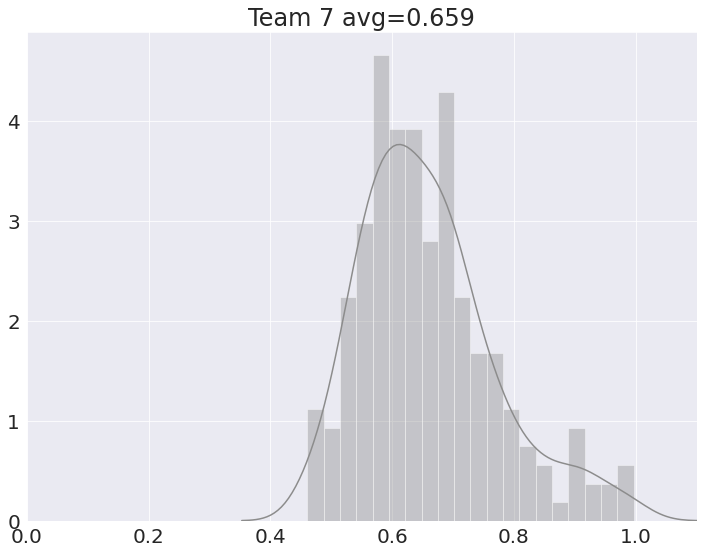

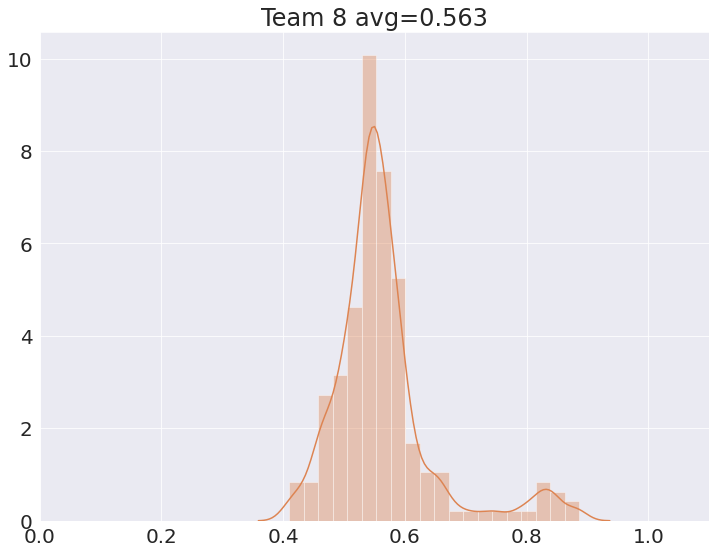

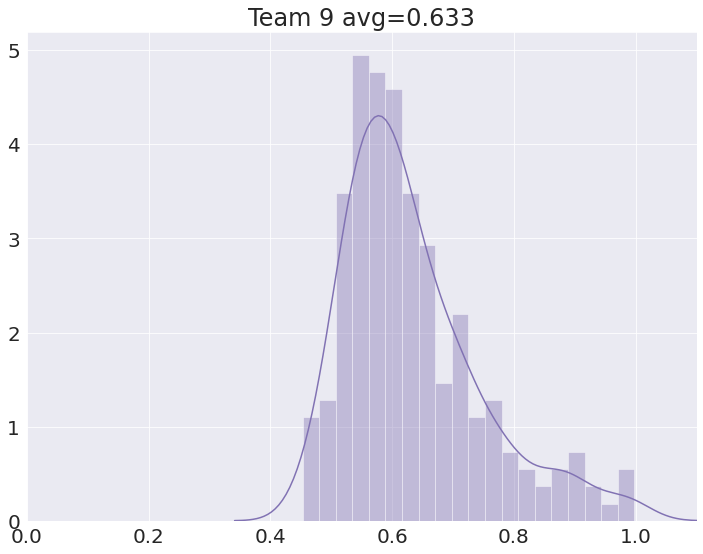

In [14]:
filter_go = [col for col in df if col.startswith('GO')]

for name, row in df_roc_deduplicated.iterrows():
    fig, ax = plt.subplots()
    sns.distplot(row[filter_go], bins=20, ax=ax, hist=True, norm_hist=False, color=row["color"])
    ax.set_title(f"{row['team_name']} avg={row[filter_go].mean():.03}")
    ax.set_xlim(0, 1.1)
    ax.set_xlabel("")
    fig.set_size_inches(12, 9)
    plt.show()

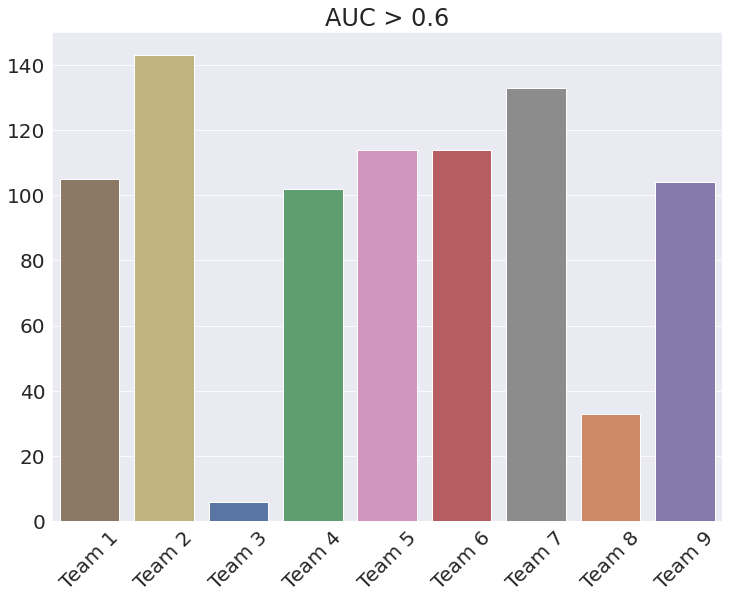

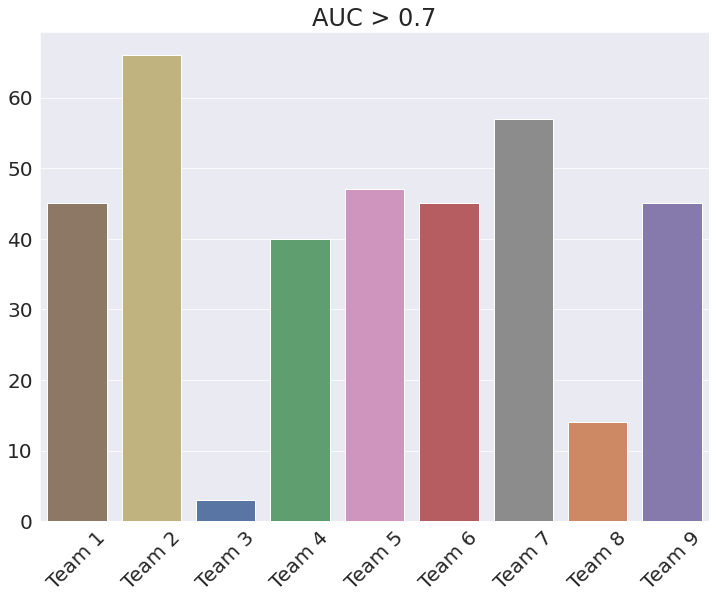

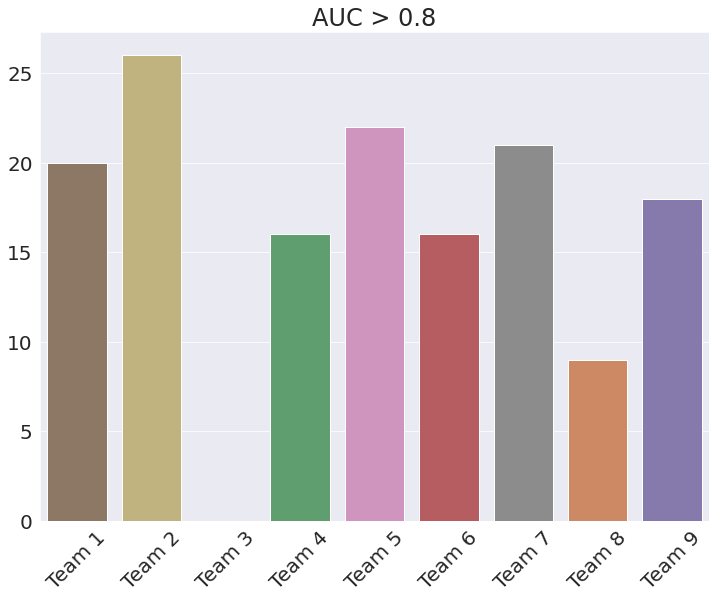

In [15]:
# number of go terms meeting auc threshold
thresholds = [.6, .7, .8]
filter_go = [col for col in df if col.startswith('GO')]

for t in thresholds:
    df_roc_deduplicated[f"t_{t}"] = (df_roc_deduplicated[filter_go] > t).sum(axis=1)
    
    fig, ax = plt.subplots()
    sns.barplot(x="team_name", y=f"t_{t}", data=df_roc_deduplicated, palette=df_roc_deduplicated["color"])
    ax.set_title(f"AUC > {t}")
    ax.set_xlabel("")
    ax.set_ylabel("")
    fig.set_size_inches(12, 9)
    plt.xticks(rotation=45)
    plt.show()

In [16]:
# # number of go terms meeting auc threshold
# thresholds = [.4, .3, .2]
# auc_thresholds = np.zeros((len(thresholds), num_submissions))
# for num in range(num_submissions):
#     for ix, t in enumerate(thresholds):
#         auc_thresholds[ix, num] = np.sum(roc_scores[:, num] < t)

In [17]:
# for ix, t in enumerate(thresholds):
#     fig, ax = plt.subplots()
#     plt.bar(range(num_submissions), auc_thresholds[ix, :])
#     ax.set_title(f"AUC < {t}")
#     plt.show()

In [18]:
filter_go = [col for col in df if col.startswith('GO')]

top_scores = np.argmax(df_roc_deduplicated[filter_go].values, axis=1)
# min_scores = np.argmax(-roc_scores, axis=1)

In [19]:
top_scores = np.argmax(df_roc_deduplicated[filter_go].values, axis=0)

In [20]:
df_roc_deduplicated["top_scores"] = np.bincount(top_scores)

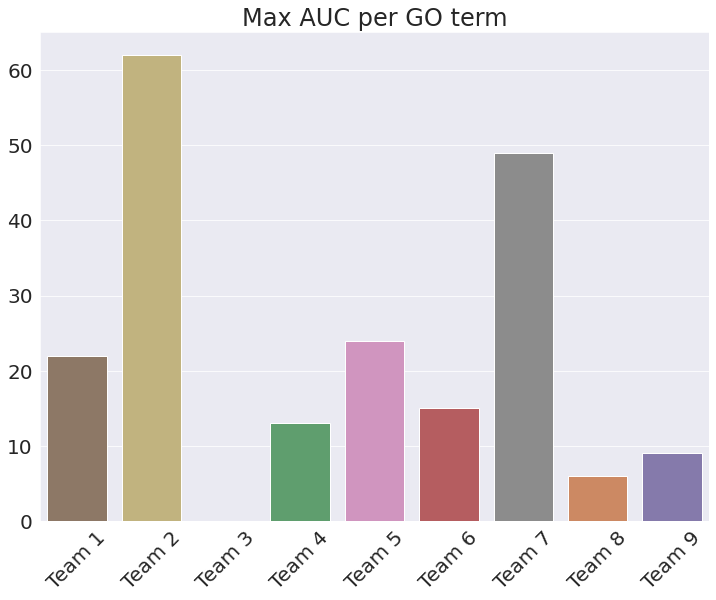

In [21]:
fig, ax = plt.subplots()
sns.barplot(x="team_name", y="top_scores", data=df_roc_deduplicated, palette=df_roc_deduplicated["color"])
ax.set_title("Max AUC per GO term")
ax.set_xlabel("")
ax.set_ylabel("")
fig.set_size_inches(12, 9)
plt.xticks(rotation=45)
plt.show()

In [22]:
# fig, ax = plt.subplots()
# plt.hist(min_scores, bins=num_submissions)
# ax.set_title("Min AUC per GO term (flipped classification)")
# plt.show()

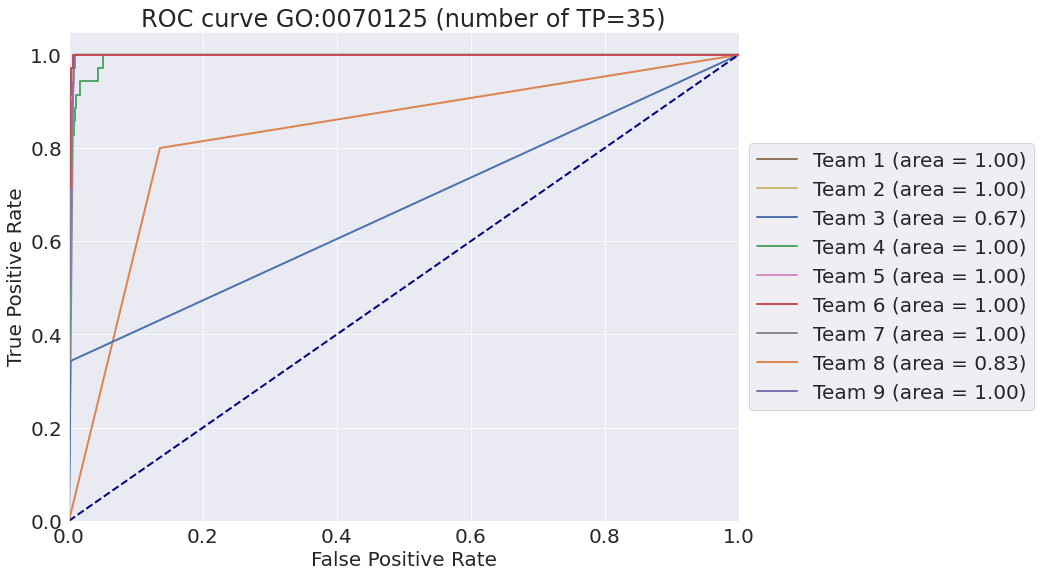

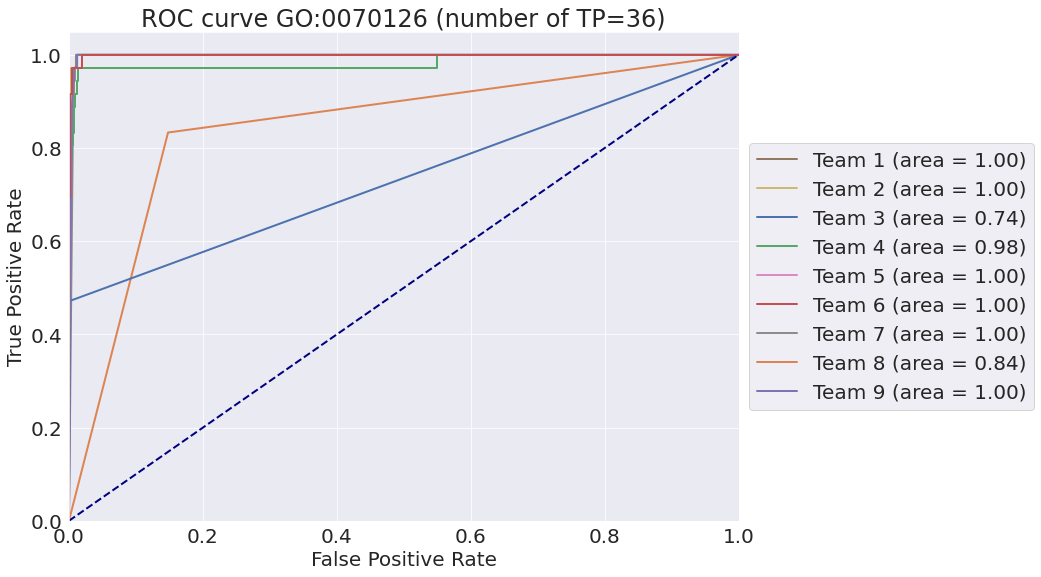

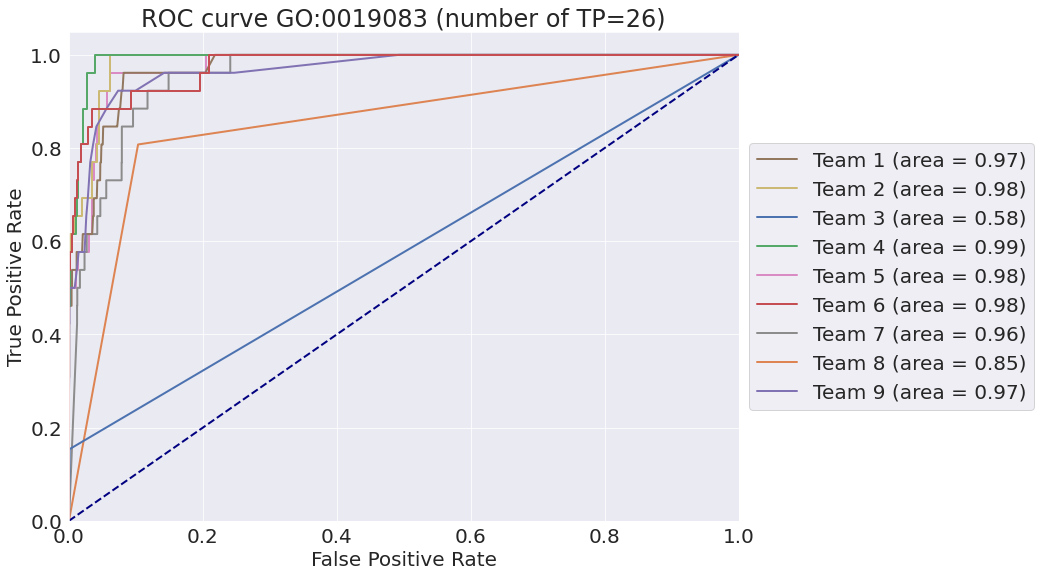

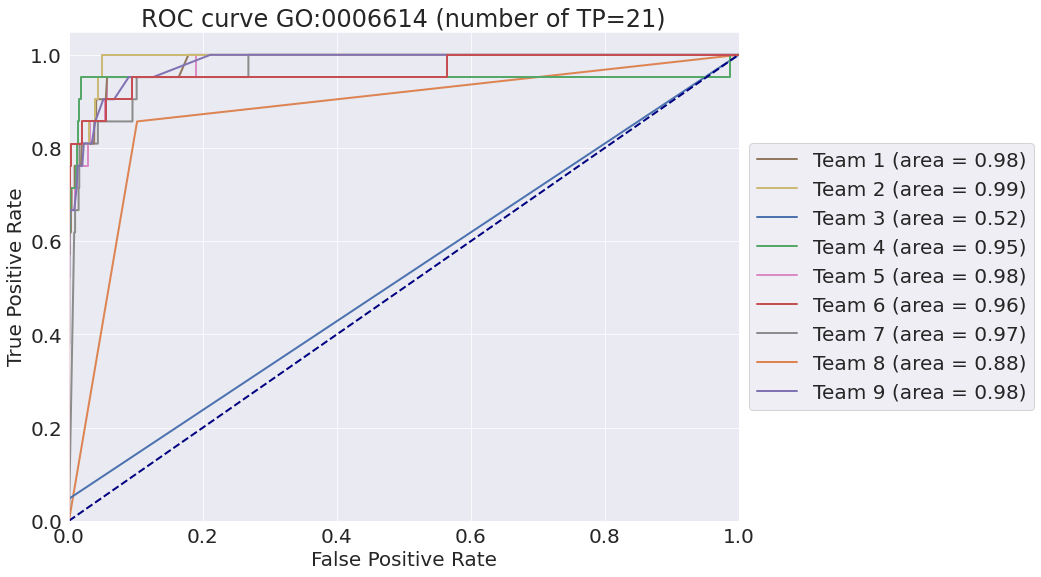

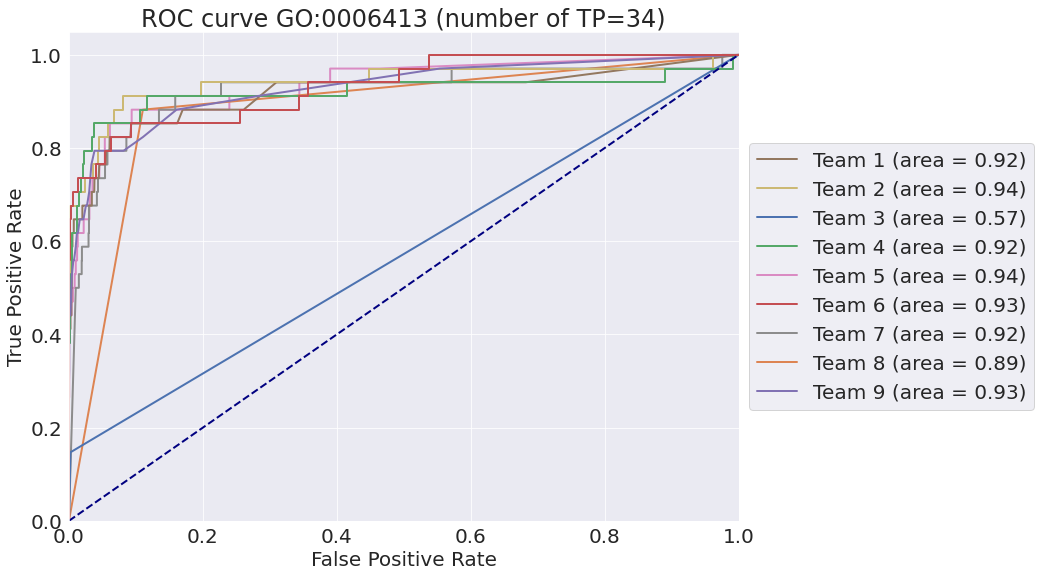

In [23]:
# plot roc curves for 5 best median wise GO terms
filter_go = [col for col in df if col.startswith('GO')]

order = np.argsort(np.median(-df_roc_deduplicated[filter_go], axis=0))

for i in range(5):
#     mask = order == i
    term = df_truth.columns[order][i]
    truth = df_truth.loc[:, term]
    fig, ax = plt.subplots()
    lw = 2
    for num, (sub, df) in enumerate(d_dfs.items()):
        if sub in df_roc_deduplicated.index:
            predictions = df.loc[:, term]

            # Compute ROC curve and ROC area for each class
            fpr, tpr, _ = metrics.roc_curve(truth, predictions)
            roc_auc = np.trapz(tpr, fpr)
            plt.plot(fpr, tpr, lw=lw, label='%s (area = %0.2f)' % (df_roc_deduplicated.loc[sub, "team_name"], roc_auc), color=df_roc_deduplicated.loc[sub, "color"])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC curve {term} (number of TP={np.sum(truth)})')
    handles, labels = ax.get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
    fig.set_size_inches(12, 9)
    plt.show()